In [12]:
import time

import numpy as np

w = 5  # window size
d = 35  # disparity range
m = 'ssd'  # matching function: ssd, sad, nc

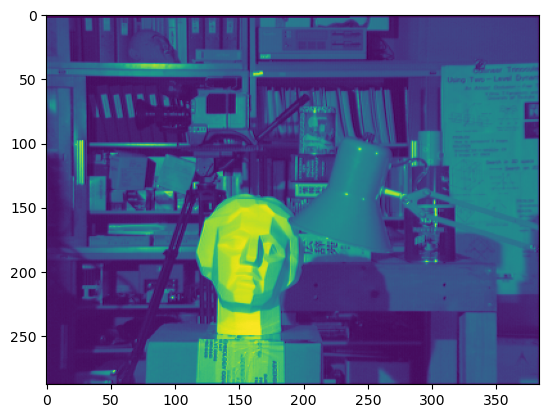

(288, 384)
(5, 5)
(25,)


In [13]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# file = 'moebius'
file = 'tsukuba'
if file == 'moebius':
    file1 = 'moebius1.png'
    file2 = 'moebius2.png'
else:
    file1 = 'tsukuba1.jpg'
    file2 = 'tsukuba2.jpg'

file_name1 = 'data/{}'.format(file1)
file_name2 = 'data/{}'.format(file2)
# I = Image.open(file_name1)
# plt.imshow(I)

im1 = cv2.imread(file_name1, 0)
# im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
plt.imshow(im1)
plt.show()
im2 = cv2.imread(file_name2, 0)
# im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im2 = im2.astype(float)

r, c = im1.shape
print(im1.shape)
print(im1[0:5, 0:5].shape)
print(np.array(im1[0:5, 0:5]).flatten().shape)

In [14]:
start_row = int(w / 2)
end_row = r - int(w / 2)
start_col = int(w / 2)
end_col = c - int(w / 2)

In [15]:
time1 = time.time()
desp1 = np.zeros((r, c, w * w))
desp2 = np.zeros((r, c, w * w))
hw = int(w / 2)
print(hw)
for i in range(start_row, end_row):
    for j in range(start_col, end_col):
        for k in range(w * w):
            desp1[i, j, k] = im1[i - hw + int(k / w), j - hw + int(k % w)]
            desp2[i, j, k] = im2[i - hw + int(k / w), j - hw + int(k % w)]

2


1.0
0.0


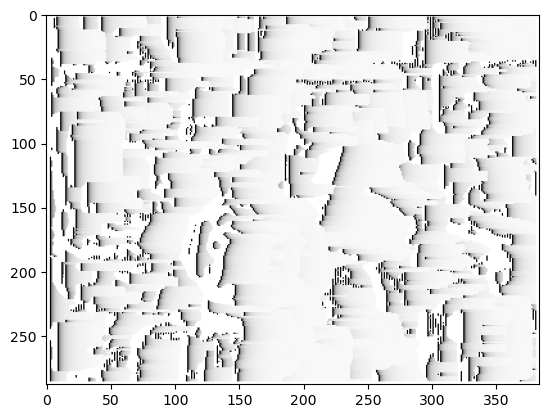

In [17]:
depth = np.zeros((r, c))
for a in range(start_row, end_row):
    for b in range(start_col, end_col):
        u = desp1[a, b]
        ubar = np.mean(u) * np.ones(w * w)
        X = np.zeros((d, 1))
        if m == 'nc':
            for i in range(d):
                if b - i < start_row:
                    X[i] = 0
                    continue
                v = desp2[a, b - i]
                vbar = np.mean(v) * np.ones(w * w)
                X[i] = np.sum((u - ubar) * (v - vbar)) / (
                        np.sqrt(np.sum((u - ubar) * 2)) * np.sqrt(np.sum((v - vbar) * 2)))
            index = np.argmax(X)
            x = b - index
        elif m == 'ssd':
            for i in range(d):
                if b - i < start_row:
                    X[i] = 100000
                    continue
                v = desp2[a, b - i]
                X[i] = np.sum((u - v) * 2)
            index = np.argmin(X)
            x = b - index
        else:
            for i in range(d):
                if b - i < start_row:
                    X[i] = 100000
                    continue
                v = desp2[a, b - i]
                X[i] = np.sum((u - v) * 2)
            index = np.argmin(X)
            x = b - index

        if b - x != 0:
            depth[a, b] = 1 / (b - x)
time2 = time.time() - time1
print(np.max(depth))
print(np.min(depth))

plt.imshow(depth, cmap='gray_r')
# cv2.imshow("depth", depth)
# cv2.waitKey()
# cv2.destroyAllWindows()

# file_name = 'results/{}_{}_{}_{}_{}.jpg'.format(file, w, d, m, time2)
# plt.savefig(file_name)